# Analysis of battery discharge rates

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt

import os
import re


## Main idea and conclusions

#### A key idea is that all the scenarios are basically the same, save for the rate at which the battery discharges.
So if we scale the time axis, the curves should match.

xscale holds manually tweaked factors, which try to accomplish this.

- 2019-09-03-001 AAA cells, full-power: baseline
- 2020-01-26-000 AAA cells, 30% duty-cycle: 4.0x longer
- 2020-09-03-000 D cells, full-power: 12x longer
- 2019-10-16-000 AAA cells, 10% duty-cycle: 5.8x longer


In [6]:
xscale = {  '2020-01-26-000.txt': 4.0
          , '2019-09-03-000.txt': 12.0
          , '2019-09-03-001.txt': 1.0
          , '2019-10-16-000.txt': 5.8}

## Estimated lifetimes

Taking full-power AAA as a baseline, multiply by D/AAA capacity and the extra lifetime we get from reducing the power.

In [7]:
baseline_lifetime = 10 # days
baseline_lifetime * xscale['2019-09-03-000.txt'] * xscale['2020-01-26-000.txt']

480.0

## Code

Define a function which pulls the time and voltage data from the vaguely free-form
text files where it's logged.

In [8]:
def load_data(filename):
    xs = []
    ys = []
    with open(filename, "r") as f:
        for l in f:
            ws = l.split()
            if len(ws) >= 5 and ws[0].startswith("20"):
                xs.append(float(ws[4]) / xscale[filename])
                ys.append(float(ws[2]))
    return [xs,ys]
        

Now just walk the directory, and plot all the data:

<IPython.core.display.Javascript object>


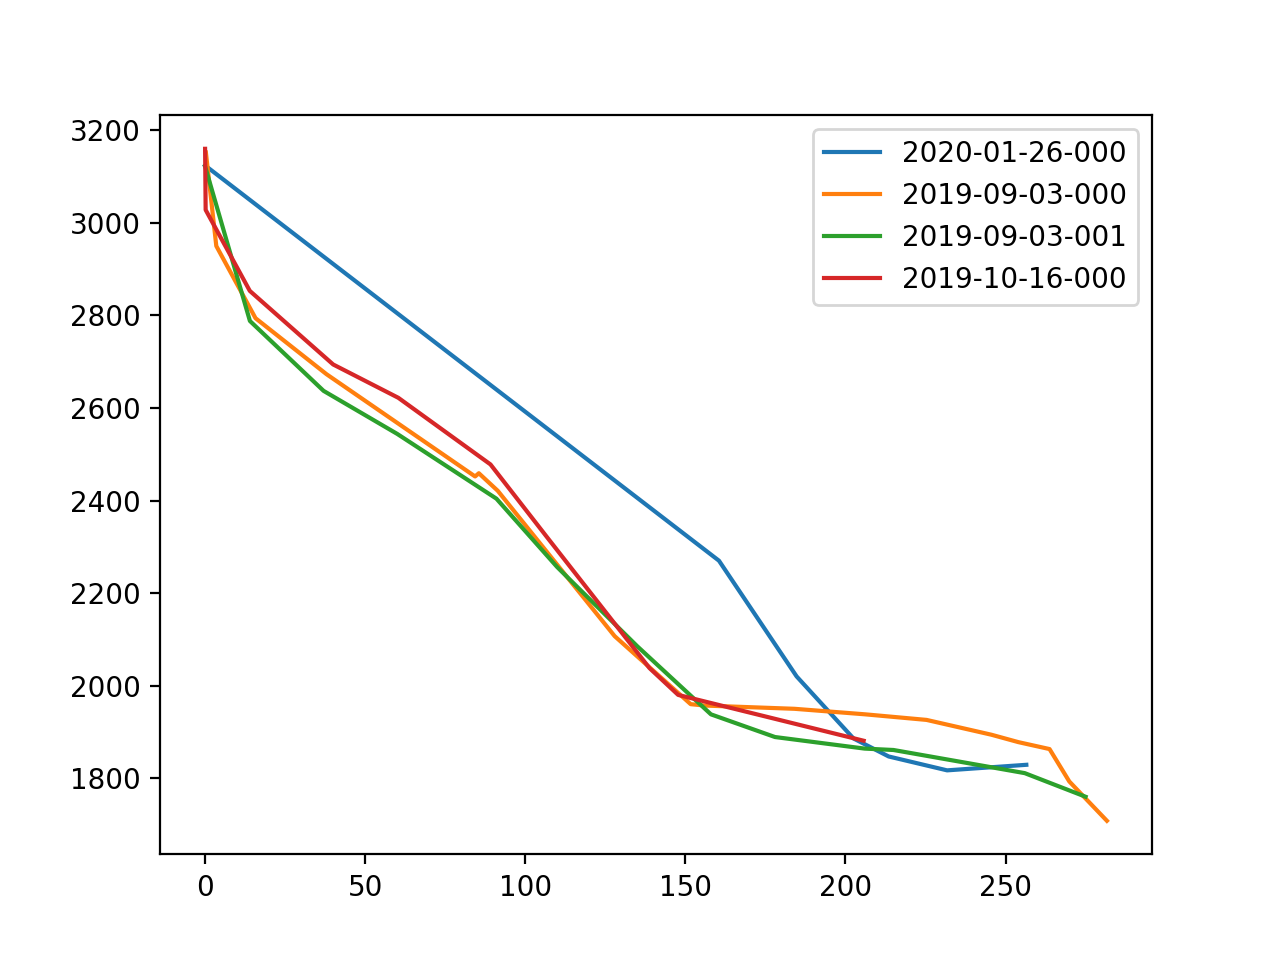

In [9]:
ts = []
for f in os.listdir():
    m = re.match(r'(\d\d\d\d-\d\d-\d\d-\d\d\d)\.txt$', f)
    if m:
        tag = m.group(1)
        d = load_data(f)
        plt.plot(d[0],d[1])
        ts.append(tag)
plt.legend(ts)
        